# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [12]:
from sklearn import datasets
iris = datasets.load_iris()

# Importing data

In [18]:
# Define the col names for the iris dataset
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Flower']

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from URL
iris_df = pd.read_csv(url, header=None, names=col_names)
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [27]:
iris_df.dropna()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Flower        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3. Encoding the class label categorical column: from string to num


c:\Users\LFCA_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


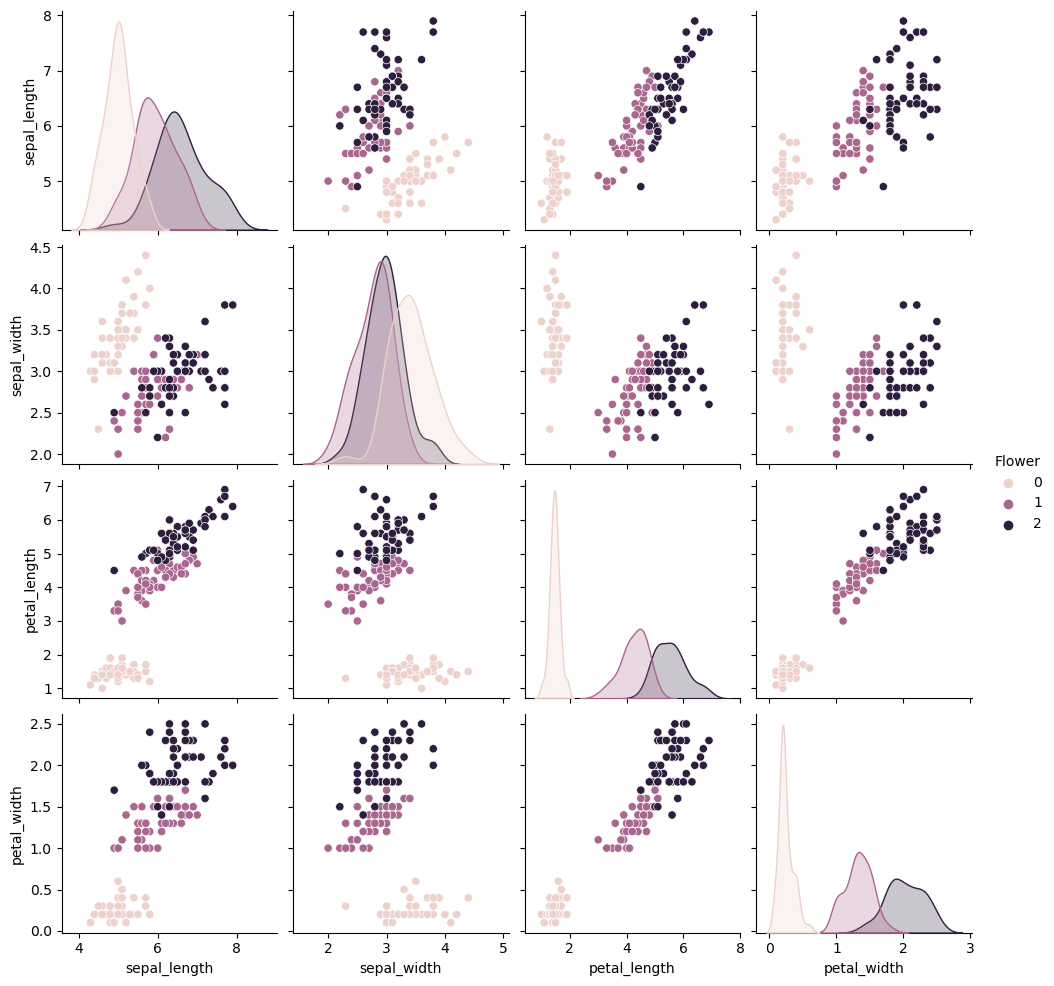

In [28]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
iris_df['Flower'] = iris_df['Flower'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

# Visualize the dataset
sns.pairplot(iris_df, hue='Flower')
plt.show()


Now the label/category is numeric


4. Discard columns that won't be used


In [29]:
# Load the dataset again to get the dropped columns back
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [30]:
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width  Flower
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


5. Scatter plot of the data

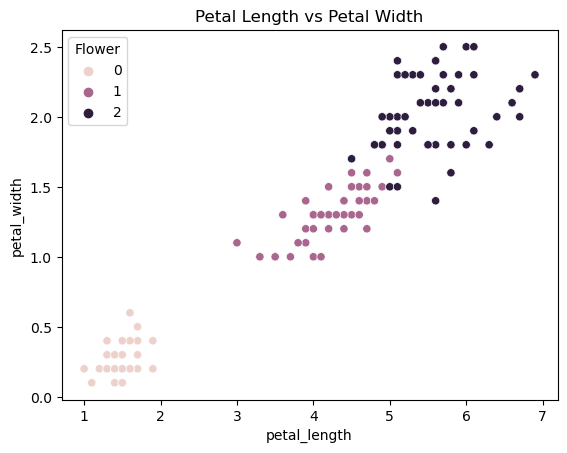

In [39]:
sns.scatterplot(data = iris_df, x='petal_length', y='petal_width', hue='Flower')
plt.title('Petal Length vs Petal Width')
plt.show()


c:\Users\LFCA_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


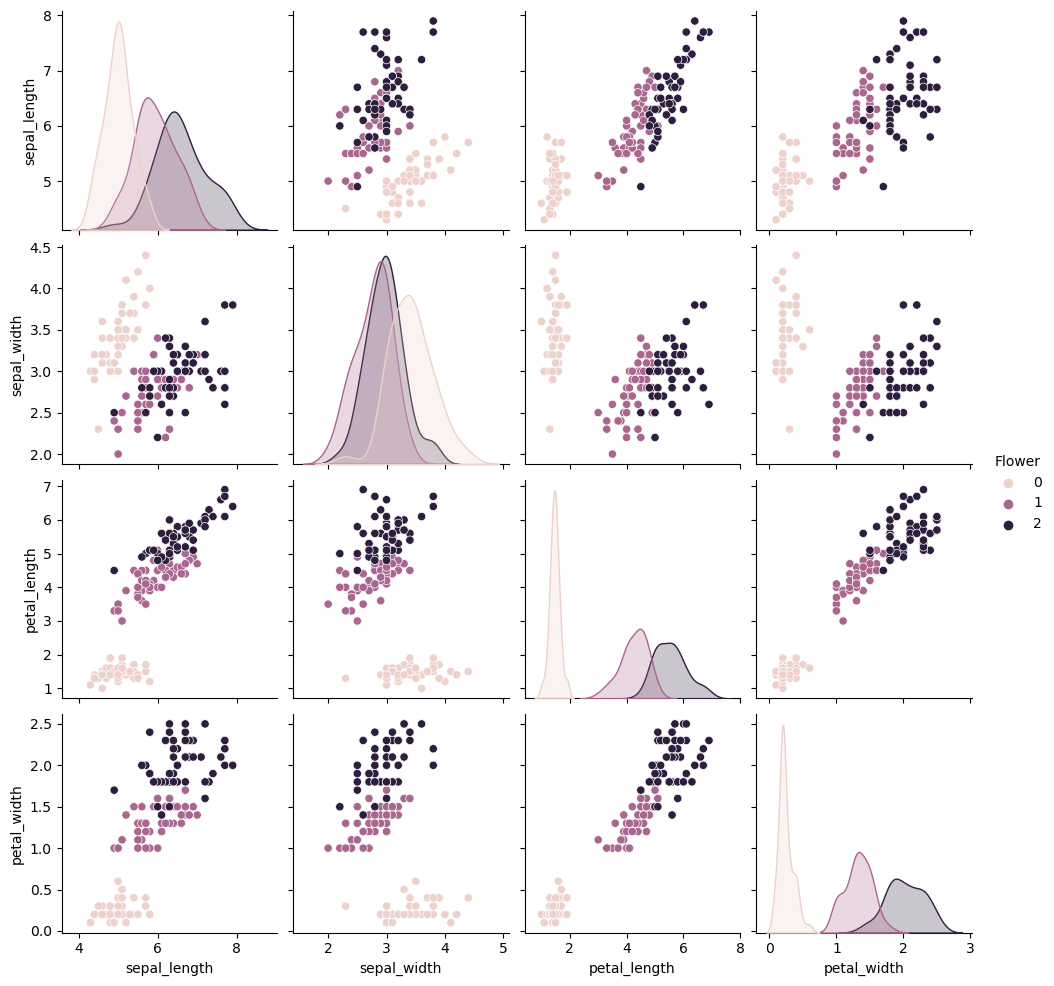

In [ ]:
sns.pairplot(iris_df, hue='Flower')
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

Cluster 0:
    sepal_length  sepal_width  petal_length  petal_width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0 

Cluster 1:
     sepal_length  sepal_width  petal_length  petal_width  Flower
50           7.0          3.2           4.7          1.4       1
51           6.4          3.2           4.5          1.5       1
52           6.9          3.1           4.9          1.5       1
53           5.5          2.3           4.0          1.3       1
54           6.5          2.8           4.6          1.5       1 

Cluster 2:
      sepal_length  sepal_width  petal_length  petal_width  Flower
100           6.3          3.3           6.0          2.5       2
101           5.8          2.7           5.1          

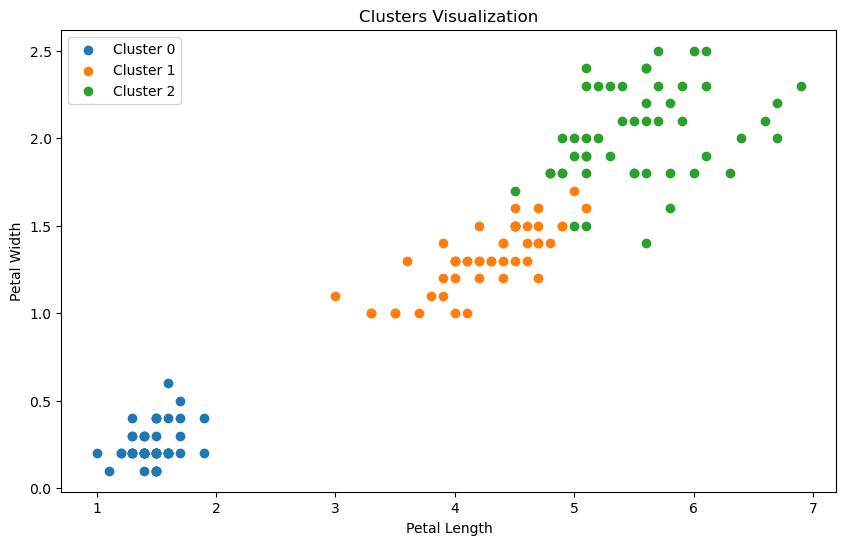

In [41]:
# Get dataframes for each real cluster
clusters = {name: group for name, group in iris_df.groupby('Flower')}
for cluster, df_cluster in clusters.items():
    print(f"Cluster {cluster}:\n", df_cluster.head(), "\n")

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
for cluster, df_cluster in clusters.items():
    plt.scatter(df_cluster['petal_length'], df_cluster['petal_width'], label=f'Cluster {cluster}')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clusters Visualization')
plt.legend()
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [55]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=k)

# Drop rows with any missing values what i did before idk why i need to do it again!
irisdf_clean = iris_df.dropna()

# Print estimated cluster of each point in the dataset
kmeans = KMeans(n_clusters=k, random_state=0).fit(irisdf_clean)

print(kmeans.labels_)

c:\Users\LFCA_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LFCA_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [58]:
# Manual pairing the labels of the real and estimated clusters
# Assuming the clusters are ordered as [0, 1, 2] for real labels and [1, 0, 2] for estimated labels
label_mapping = {0: 1, 1: 0, 2: 2}

# Apply the mapping to the estimated labels
irisdf_clean = irisdf_clean.copy()  # Ensure we are working with a copy
irisdf_clean.loc[:, 'EstimatedCluster'] = kmeans.labels_
irisdf_clean.loc[:, 'EstimatedCluster'] = irisdf_clean['EstimatedCluster'].map(label_mapping)

# Display the updated DataFrame
irisdf_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,Flower,Cluster,Estimated_Label,EstimatedCluster
0,5.1,3.5,1.4,0.2,0,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0,0


In [60]:
# Add a new column to the dataset with the cluster information
iris_df['EstimatedCluster'] = irisdf_clean['EstimatedCluster']


In [61]:
# Label of the estimated clusters
cluster_0_est = iris_df[iris_df['EstimatedCluster'] == 0]
cluster_1_est = iris_df[iris_df['EstimatedCluster'] == 1]
cluster_2_est = iris_df[iris_df['EstimatedCluster'] == 2]



In [62]:
# Cluster centroides
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)


Cluster centroids:
 [[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


In [63]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(f"Sum of squared error (SSE) of the final model: {sse}")


Sum of squared error (SSE) of the final model: 31.387758974358974


In [64]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print(f"The number of iterations required to converge: {iterations}")


The number of iterations required to converge: 5


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

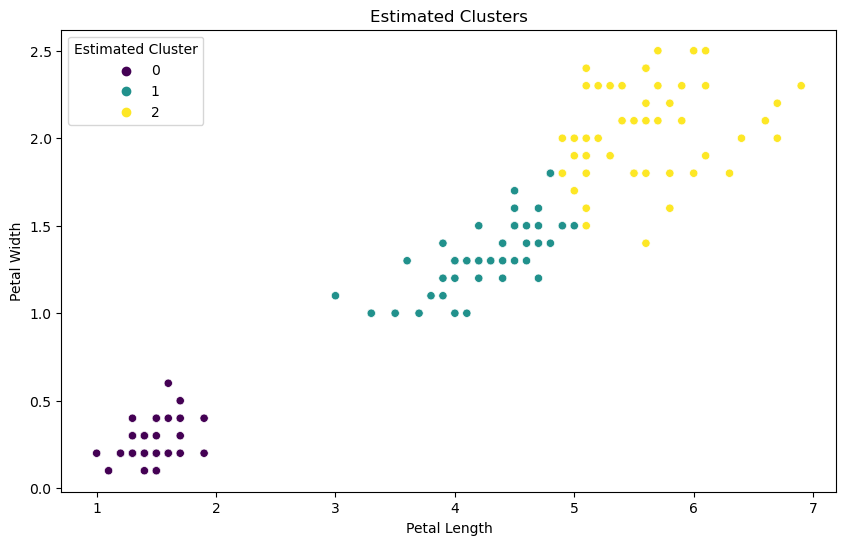

In [65]:
# Plot estimated clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='EstimatedCluster', palette='viridis')
plt.title('Estimated Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Estimated Cluster')
plt.show()

## Plot both real and estimated clusters to check for errors

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

c:\Users\LFCA_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LFCA_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LFCA_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LFCA_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

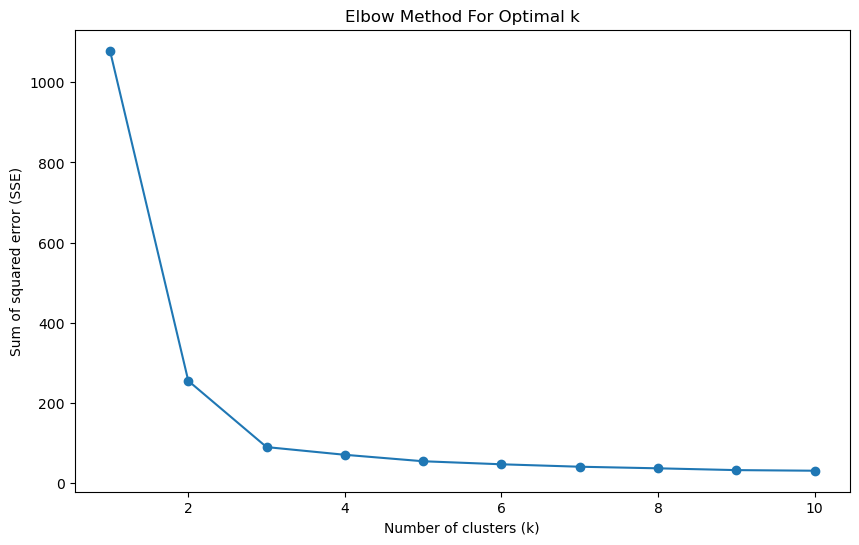

In [66]:
# Initialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_values = range(1, 11)

# For each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(irisdf_clean)
    sse.append(kmeans.inertia_)

# Plot sse versus k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()



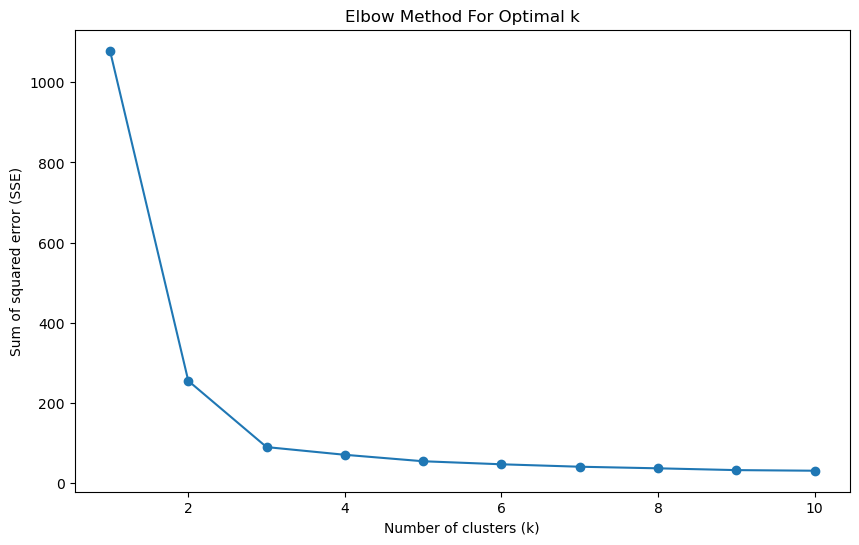

In [67]:
# Plot SSE versus k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


Choose the k after which the sse is minimally reduced


In [69]:
# Determine the optimal k using the elbow method
optimal_k = 3
for i in range(1, len(sse)):
    if sse[i] - sse[i-1] < 0.1 * (sse[1] - sse[0]):
        optimal_k = i + 2
        break

print(f"The optimal number of clusters (k) is: {optimal_k}")

The optimal number of clusters (k) is: 3


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k